In [1]:
%matplotlib inline

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
from PIL import Image
import json
import chardet

#####################################

In [ ]:
from PIL import Image
  
# open method used to open different extension image file
im = Image.open(r"sample_dataset/images/training_images_take_7_279.png") 
  
# This method will show image in any image viewer 
im.show() 

In [ ]:
# Python program to read
# json file


import json

# Opening JSON file
f = open('sample_dataset/labels/json/training_images_take_7_279.json')

# returns JSON object as
# a dictionary
#data = json.load(f)
print(type(f))
# Iterating through the json
# list
# Closing file
f.close()


In [ ]:
import json

# Open the JSON file and load the data
with open('sample_dataset/labels/json/training_images_take_7_279.json', 'r') as f:
    data = json.load(f)

# Print the data to verify that it was loaded correctly
print(data)


In [ ]:
with open('sample_dataset/labels/json/training_images_take_7_279.json', 'r') as f:
    contents = f.read()
    print(contents)


In [ ]:
import json

with open('sample_dataset/labels/json/training_images_take_7_279.json', 'r') as f:
    data = json.load(f)
    for obj in data:
        print(obj)

In [ ]:
import json

with open('training_images_take_7_279.json', 'r',encoding='utf-16') as f:
    data = json.load(f)
    print(data)


#################################

1. Load dataset and labels

In [3]:
class MyDataset(Dataset):
    def __init__(self, image_dir, label_dir):
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.images = os.listdir(image_dir)
        self.labels = os.listdir(label_dir)

    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        label_path = os.path.join(self.label_dir, self.labels[index])
        #
        with open(label_path, 'rb') as f:
            result = chardet.detect(f.read())
        encoding = result['encoding']
        print(f"Detected encoding for: {encoding}")
        #
        with open(label_path, 'r',encoding=encoding) as f:
            label = json.load(f)
        img = Image.open(img_path).convert('RGB')
        return img, label

    def __len__(self):
        return len(self.images)

In [4]:
dataset = MyDataset('sample_dataset/images', 'sample_dataset/labels/json')

In [5]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

2. Visualize some of the labeled images

In [6]:
def show_image(img, label, ax):
    ax.imshow(img)
    ax.axis('off')
    for obj in label:
        bbox = obj['Left'], obj['Top'], obj['Right'], obj['Bottom']
        cls = obj['ObjectClassName']
        ax.add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], fill=False, edgecolor='red', linewidth=2))
        ax.text(bbox[0], bbox[1]-10, cls, fontsize=12, color='red')


Detected encoding for: UTF-16
Detected encoding for: UTF-16
Detected encoding for: UTF-16
Detected encoding for: UTF-16
Detected encoding for: UTF-16
Detected encoding for: UTF-16
Detected encoding for: UTF-16
Detected encoding for: UTF-16
Detected encoding for: UTF-16


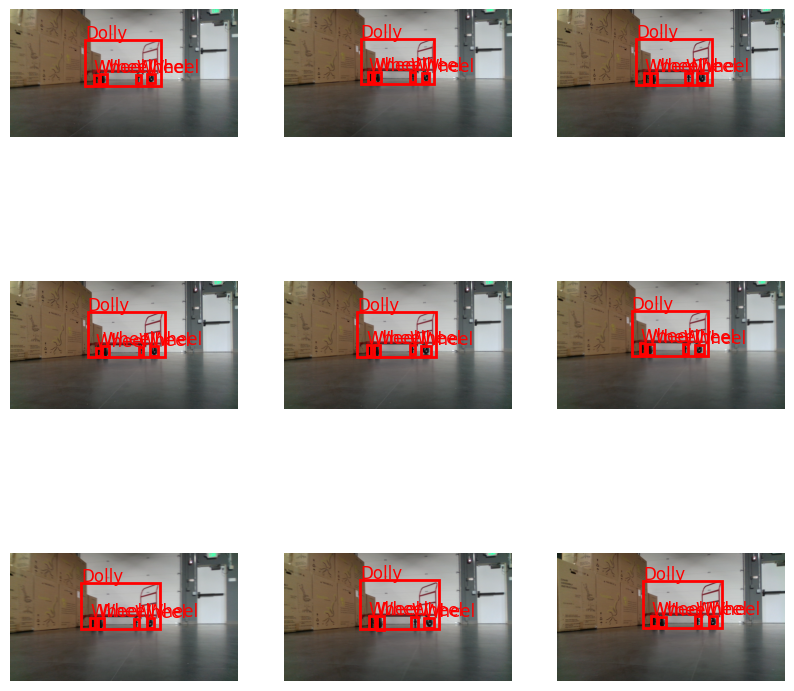

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i in range(9):
    img, label = dataset[i]
    ax = axes[i//3, i%3]
    show_image(img, label, ax)
plt.show()

Detected encoding for: UTF-16


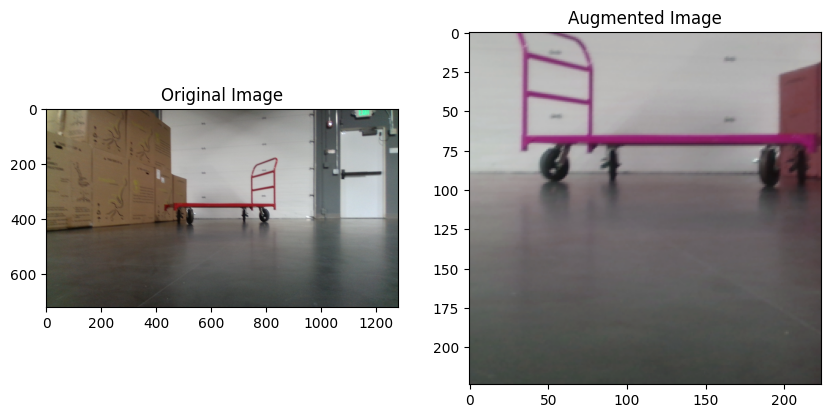

In [124]:
import torchvision.transforms as transforms

# define some data augmentations
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
])

# load a sample image
img, label = dataset[0]

# apply data augmentations
aug_img = transform(img)

# display original and augmented images
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[1].imshow(aug_img.permute(1, 2, 0))
axs[1].set_title('Augmented Image')
plt.show()


In [125]:
from sklearn.model_selection import train_test_split

In [126]:
# Split the dataset into training and validation sets
train_indices, val_indices = train_test_split(range(len(dataset)), test_size=0.2, random_state=42)

# Create the data loaders for the training and validation sets
train_loader = DataLoader(dataset, batch_size=16, sampler=train_indices)
val_loader = DataLoader(dataset, batch_size=16, sampler=val_indices)

In [140]:
!pip install git+https://github.com/ultralytics/yolov5.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/ultralytics/yolov5.git to c:\users\user\appdata\local\temp\pip-req-build-93gvobtn
  Resolved https://github.com/ultralytics/yolov5.git to commit 94714fe6addff41e4984ff510f70cc415a131725


  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git 'C:\Users\user\AppData\Local\Temp\pip-req-build-93gvobtn'
ERROR: git+https://github.com/ultralytics/yolov5.git does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
import yolov5

In [138]:
# load pretrained model
model = yolov5.load('yolov5s.pt')

YOLOv5  2023-4-15 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce MX110, 2048MiB)


Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients
Adding AutoShape... 


In [142]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\user/.cache\torch\hub\master.zip
YOLOv5  2023-4-15 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce MX110, 2048MiB)



requirements: C:\Users\user\.cache\torch\hub\requirements.txt not found, check failed.


Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients
Adding AutoShape... 


In [144]:
results = model()

AttributeError: 'DataLoader' object has no attribute 'shape'

In [139]:
# set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image